# Import libraries

In [0]:
import torch
import torch.optim as optim
import torchvision
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F


#Install fast_torch
!pip install fast_torch

# Create datasets

In [0]:
transforms = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.1307,), (0.3081,))])
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms)
mnist_trainset, mnist_valset = torch.utils.data.random_split(mnist_trainset, (55000, 5000))
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms)

train_loader = DataLoader(mnist_trainset, batch_size=32, shuffle=True, drop_last=True)
val_loader = DataLoader(mnist_valset, batch_size=32, shuffle=True, drop_last=True)
test_loader = DataLoader(mnist_testset, batch_size=32, shuffle=True, drop_last=True)

# Plot datasets stats

In [3]:
import fast_torch.plotter as ftplot

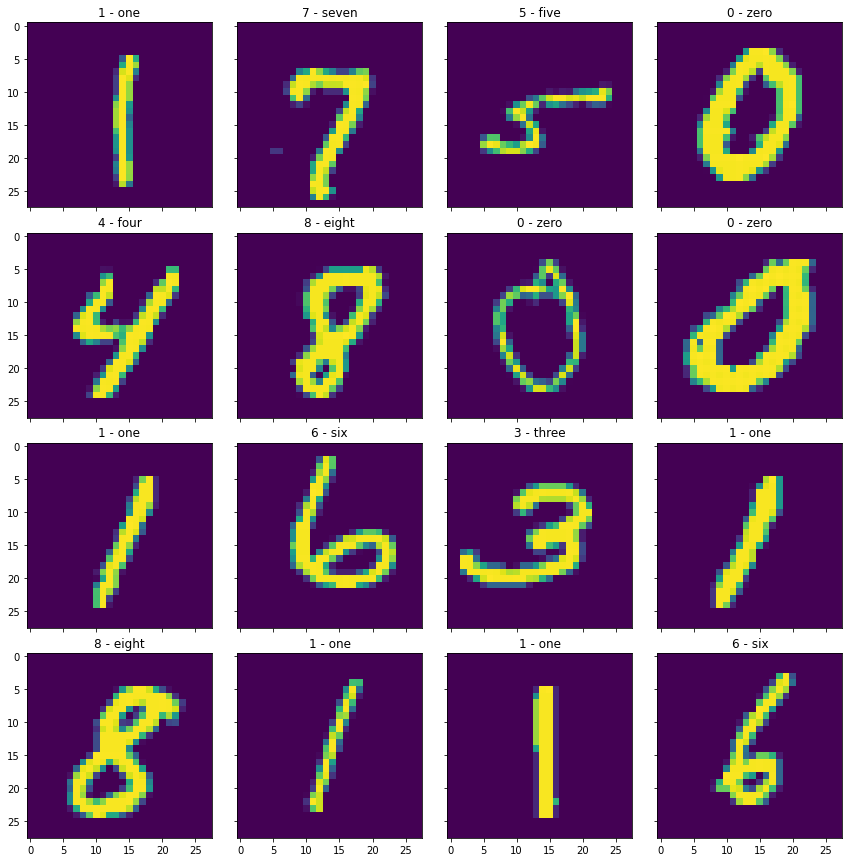

In [4]:
ftplot.plot_images(train_loader)

processing training data



processing test data



processing validation data


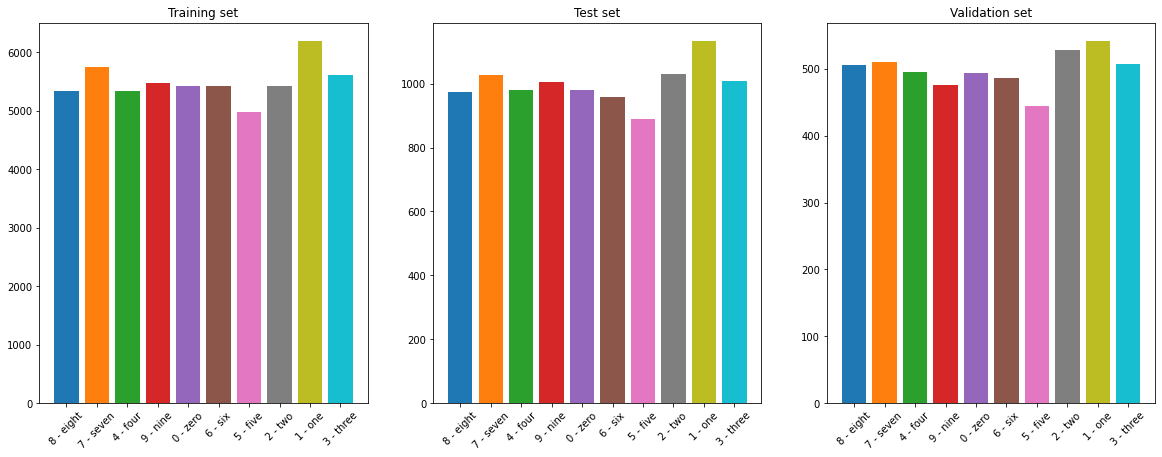

In [5]:
ftplot.plot_classes_distributions(train_loader, test_loader, val_loader)

# Define your model

In [0]:
class Model(nn.Module):
	def __init__(self):
		super(Model, self).__init__()
		self.conv1 = nn.Conv2d(1, 32, 3)
		self.conv2 = nn.Conv2d(32, 64, 5)
		self.lin = nn.Linear(64 * 22 * 22, len(mnist_trainset.dataset.classes))

	def forward(self, x):
		x = F.relu(self.conv1(x))
		x = F.relu(self.conv2(x))
		x = x.view(-1, 64 * 22 * 22)
		x = self.lin(x)
		return F.log_softmax(x, dim=-1)

# Train the model

In [0]:
import fast_torch.model_wrapper as mw

model = Model()
training_opts = {
	"epochs": 5,
	"criterion": nn.CrossEntropyLoss(),
	"optimizer": optim.SGD(model.parameters(), lr=0.01),
	"early_stopping_patience": 2
}

clf = mw.Classifier(model, training_opts, train_loader, test_loader, val_loader, device="cuda")

In [8]:
clf.train()

Model(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (lin): Linear(in_features=30976, out_features=10, bias=True)
)
--------------------------------------------------------------------------------
Epoch : 1/5
Starting training



Starting validation



Accuracy increased from 0 to 97.0353 ... Saving model as best_model.pth
Training Loss: 0.1861, Validation Loss: 0.098, Validation Accuracy: 97.0353, early_stopping_patience: 2
--------------------------------------------------------------------------------
Epoch : 2/5
Starting training



Starting validation



Accuracy increased from 97.0353 to 97.8766 ... Saving model as best_model.pth
Training Loss: 0.0723, Validation Loss: 0.0726, Validation Accuracy: 97.8766, early_stopping_patience: 2
--------------------------------------------------------------------------------
Epoch : 3/5
Starting training



Starting validation



Accuracy increased from 97.8766 to 98.097 ... Saving model as best_model.pth
Training Loss: 0.054, Validation Loss: 0.0616, Validation Accuracy: 98.097, early_stopping_patience: 2
--------------------------------------------------------------------------------
Epoch : 4/5
Starting training



Starting validation



Training Loss: 0.043, Validation Loss: 0.0636, Validation Accuracy: 97.9768, early_stopping_patience: 1
--------------------------------------------------------------------------------
Epoch : 5/5
Starting training



Starting validation



Accuracy increased from 98.097 to 98.1571 ... Saving model as best_model.pth
Training Loss: 0.0362, Validation Loss: 0.0601, Validation Accuracy: 98.1571, early_stopping_patience: 2


# Test the model

In [9]:
clf.test()

--------------------------------------------------------------------------------
Starting testing:



Accuracy of 98.4475 for the test test


# Plot stats after training

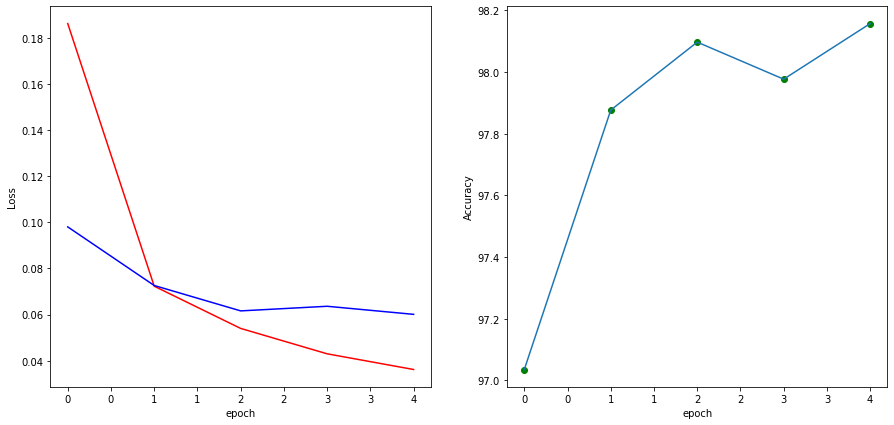

In [10]:
clf.plot_training_stats()

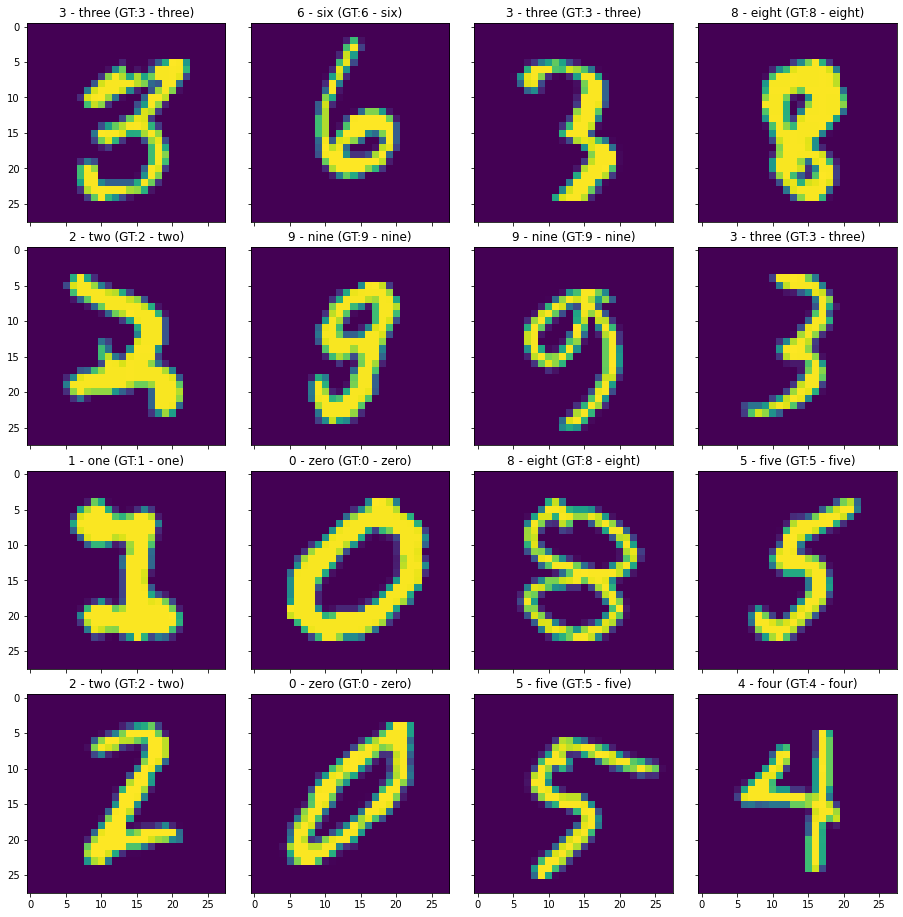

In [11]:
clf.plot_random_predictions()

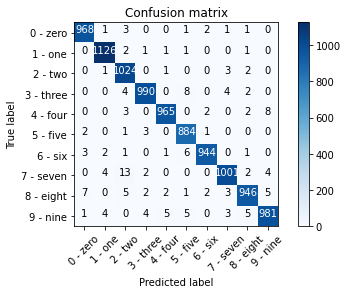

In [12]:
clf.plot_confusion_matrix()